<a href="https://colab.research.google.com/github/fulllz/DSProjects/blob/main/NLP_3_Binary_Classification_of_IMDB_Movie_Reviews_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Binary Classification refers to classifying samples in one of two categories. In this porject, we will design three neural networks to perform binary classification of reviews from the IMDB moviereviews dataset, to determine whether the reviews are positive or negative.We will use the Python library, Tensorflow. Models are:  
1. CNN for text
2. Bidirectional LSTM
3. Pretrained Word Embedding

The IMDB dataset is
a set of 50,000 highly polarized reviews from theInternet Movie Database. They are split into 25000 reviews each fortraining and testing. Each set contains an equal number (50%) of positiveand negative reviews.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow.keras.datasets import imdb
import tensorflow_datasets as tfds
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers,models, optimizers, losses, metrics


## CNN Model

In [ ]:
# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
train_data.shape

(25000,)

In [ ]:

# Since we restricted ourselves to the top 10000 frequent words, no word index should exceed 10000
# we'll verify this below

# Here is a list of maximum indexes in every review --- we search the maximum index in this list of max indexes
print(type([max(sequence) for sequence in train_data]))

# Find the maximum of all max indexes
max([max(sequence) for sequence in train_data])

<class 'list'>


9999

In [ ]:
# Let's quickly decode a review

# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()

# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Step 3: decode the review, mapping integer indices to words
#
# indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of sequence" and "unknown"
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

decoded_review

1646592/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))    # Creates an all zero matrix of shape (len(sequences),10K)
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1                        # Sets specific indices of results[i] to 1s
    return results

# Vectorize training Data
X_train = vectorize_sequences(train_data)

# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [ ]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
X_train.shape

(25000, 10000)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

In [ ]:

# Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=10,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Epoch 1/10
30/30 [==============================] - 4s 38ms/step - loss: 0.5952 - binary_accuracy: 0.7000 - val_loss: 0.3986 - val_binary_accuracy: 0.8672
Epoch 2/10
30/30 [==============================] - 1s 19ms/step - loss: 0.3337 - binary_accuracy: 0.9003 - val_loss: 0.3186 - val_binary_accuracy: 0.8814
Epoch 3/10
30/30 [==============================] - 1s 20ms/step - loss: 0.2333 - binary_accuracy: 0.9288 - val_loss: 0.2819 - val_binary_accuracy: 0.8887
Epoch 4/10
30/30 [==============================] - 1s 19ms/step - loss: 0.1828 - binary_accuracy: 0.9452 - val_loss: 0.2767 - val_binary_accuracy: 0.8877
Epoch 5/10
30/30 [==============================] - 1s 19ms/step - loss: 0.1459 - binary_accuracy: 0.9591 - val_loss: 0.2826 - val_binary_accuracy: 0.8868
Epoch 6/10
30/30 [==============================] - 1s 19ms/step - loss: 0.1190 - binary_accuracy: 0.9674 - val_loss: 0.2960 - val_binary_accuracy: 0.8835
Epoch 7/10
30/30 [==============================] - 1s 19ms/step - los

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

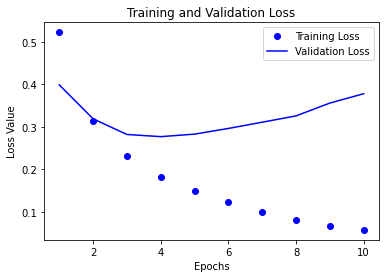

In [ ]:
# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

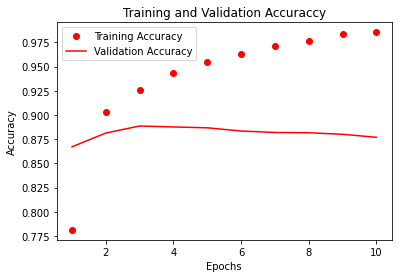

In [ ]:
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Making Predictions for testing data
np.set_printoptions(suppress=True)
result = model.predict(X_test)

In [ ]:
result

array([[0.041587  ],
       [0.9999958 ],
       [0.93891   ],
       ...,
       [0.01260788],
       [0.03138355],
       [0.5484439 ]], dtype=float32)

In [ ]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = 1 if score > 0.5 else 0

In [ ]:

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_test)

In [ ]:
# Error
mae

0.13844

# Bidirectional LSTM 
Train a 2-layer bidirectional LSTM on the IMDB movie review sentiment classification dataset.

## Setup

In [ ]:
max_features = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review


## Build the model

In [ ]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,757,761
Trainable params: 2,757,761
Non-trainable params: 0
_________________________________________________________________


## Load the IMDB movie review sentiment data

In [ ]:
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(
    num_words=max_features
)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 Training sequences
25000 Validation sequences


## Train and evaluate the model

In [ ]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
782/782 [==============================] - 85s 68ms/step - loss: 0.4527 - accuracy: 0.7693 - val_loss: 0.3296 - val_accuracy: 0.8616
Epoch 2/10
782/782 [==============================] - 51s 65ms/step - loss: 0.1896 - accuracy: 0.9311 - val_loss: 0.3372 - val_accuracy: 0.8649
Epoch 3/10
782/782 [==============================] - 51s 65ms/step - loss: 0.1094 - accuracy: 0.9618 - val_loss: 0.4150 - val_accuracy: 0.8466
Epoch 4/10
782/782 [==============================] - 51s 66ms/step - loss: 0.0751 - accuracy: 0.9763 - val_loss: 0.4446 - val_accuracy: 0.8553
Epoch 5/10
782/782 [==============================] - 51s 65ms/step - loss: 0.0481 - accuracy: 0.9845 - val_loss: 0.5598 - val_accuracy: 0.8518
Epoch 6/10
782/782 [==============================] - 52s 67ms/step - loss: 0.0376 - accuracy: 0.9872 - val_loss: 0.5731 - val_accuracy: 0.8500
Epoch 7/10
782/782 [==============================] - 54s 69ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.7249 - val_accuracy:

## Pretrained Word Embedding


In [ ]:
# Download IMDB dataset from tensorflow_datasets module
train_data, test_data = tfds.load(name='imdb_reviews', split=['train', 'test'], batch_size=-1, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete1W4KWI/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete1W4KWI/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete1W4KWI/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
X_train, y_train = tfds.as_numpy(train_data)
X_test, y_test = tfds.as_numpy(test_data)

In [ ]:
len(X_train)

25000

In [ ]:
len(X_test)

25000

In [ ]:
# sample ones
for index in range(10, 15):
  print(f'sentence {index}: {X_train[index]}\n  Label: {y_train[index]}')

sentence 10: b'During a sleepless night, I was switching through the channels & found this embarrassment of a movie. What were they thinking?<br /><br />If this is life after "Remote Control" for Kari (Wuhrer) Salin, no wonder she\'s gone nowhere.<br /><br />And why did David Keith take this role? It\'s pathetic!<br /><br />Anyway, I turned on the movie near the end, so I didn\'t get much of the plot. But this must\'ve been the best part. This nerdy college kid brings home this dominatrix-ish girl...this scene is straight out of the comic books -- or the cheap porn movies. She calls the mother anal retentive and kisses the father "Oh, I didn\'t expect tongue!" Great lines!<br /><br />After this, I had to see how it ended..<br /><br />Well, of course, this bitch from hell has a helluva past, so the SWAT team is upstairs. And yes...they surround her! And YES YES! The kid blows her brains out!!!! AHAHHAHAHAHA!!<br /><br />This is must-see TV. <br /><br />'
  Label: 0
sentence 11: b'Cute f

In [ ]:
# embedding_model = 'https://tfhub.dev/google/nnlm-en-dim50/2'   84%
embedding_model = 'https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2'
embedding_layer = hub.KerasLayer(embedding_model, input_shape=[], dtype=tf.string, trainable=True)
sample = embedding_layer(X_train[:2])
sample

<tf.Tensor: shape=(2, 128), dtype=float32, numpy=
array([[ 1.1501508 ,  0.078013  ,  0.09266154,  0.28336146,  0.00967164,
        -0.14918603,  0.3356657 , -0.3502448 , -0.00828831, -0.0187714 ,
        -0.03330697, -0.6330942 , -0.37542117, -0.27773282, -0.09661756,
         0.17255366, -0.13367656,  0.03807658, -0.27513817,  0.4947623 ,
         0.03930517,  0.13449624, -0.2707282 ,  0.01789428, -0.2410716 ,
         0.02710899,  0.10233343, -0.10662853,  0.05242986,  0.11917052,
        -0.00667078,  0.3392315 ,  0.11301497,  0.10684261,  0.39157125,
        -0.18953632, -0.17400031, -0.10644417, -0.13420047,  0.17358392,
        -0.27769503, -0.04335914, -0.03915006, -0.19834091,  0.02748548,
         0.276703  ,  0.14070286, -0.3142561 ,  0.02475694, -0.16730827,
         0.08217403, -0.09568419, -0.25733578,  0.3729147 , -0.22105993,
        -0.21443687, -0.05832561,  0.15003687, -0.16772385, -0.080281  ,
        -0.21137346, -0.0039831 ,  0.06347676,  0.06651689,  0.09252462,
 

In [ ]:
## build model
model = tf.keras.Sequential()
model.add(embedding_layer)
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 128)               124642688 
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 124,652,001
Trainable params: 124,652,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# create validation dataset
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(partial_X_train, partial_y_train, batch_size=512, epochs=10, verbose=1, validation_data=(X_val, y_val))

Epoch 1/10
30/30 [==============================] - 4s 122ms/step - loss: 0.6296 - accuracy: 0.5458 - val_loss: 0.4568 - val_accuracy: 0.7524
Epoch 2/10
30/30 [==============================] - 4s 118ms/step - loss: 0.3743 - accuracy: 0.8266 - val_loss: 0.3012 - val_accuracy: 0.8699
Epoch 3/10
30/30 [==============================] - 3s 117ms/step - loss: 0.1924 - accuracy: 0.9270 - val_loss: 0.2635 - val_accuracy: 0.8914
Epoch 4/10
30/30 [==============================] - 4s 117ms/step - loss: 0.0987 - accuracy: 0.9677 - val_loss: 0.2665 - val_accuracy: 0.8978
Epoch 5/10
30/30 [==============================] - 4s 119ms/step - loss: 0.0498 - accuracy: 0.9908 - val_loss: 0.3008 - val_accuracy: 0.8848
Epoch 6/10
30/30 [==============================] - 4s 119ms/step - loss: 0.0246 - accuracy: 0.9959 - val_loss: 0.3108 - val_accuracy: 0.8951
Epoch 7/10
30/30 [==============================] - 4s 118ms/step - loss: 0.0132 - accuracy: 0.9986 - val_loss: 0.3472 - val_accuracy: 0.8868
Epoch 

In [ ]:
# Model evaluating
results = model.evaluate(X_test, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.4912 - accuracy: 0.8631
